In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
mofa_drugs = pd.read_csv("../data/MOFA/mofa_drugs.csv")
drug_score = pd.read_csv("../data/drug/202004092336_drug_scores.tsv", sep='\t')
drug_list = drug_score[
    (drug_score['MultiDrug_correlation'] > 0.4) & (drug_score['sensitive_count'] > 20)][
    'Drug Id'].values
drug_score = drug_score[drug_score['Drug Id'].isin(drug_list)]

In [27]:
drug_score[drug_score['Drug_Type']=='Chemotherapeutic']

,Drug Id,RNA_correlation,MultiDrug_correlation,delta,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,cell_line_count,sensitive_count,sensitive_ratio,Drug_Type
42,134,0.435670,0.420400,-0.015270,MGH,Etoposide,"Etopophos, Vepesid, Eposin, VP-16",TOP2,DNA replication,886,662.0,0.747178,Chemotherapeutic
43,135,0.443785,0.468908,0.025123,MGH,Gemcitabine,"Gemzar, LY-188011",Pyrimidine antimetabolite,DNA replication,865,677.0,0.782659,Chemotherapeutic
44,136,0.432210,0.457851,0.025641,MGH,Mitomycin-C,"Mytozytrex, NSC-26980, MMC, Mitosol, Mitozytrex",DNA crosslinker,DNA replication,877,866.0,0.987457,Chemotherapeutic
70,179,0.620066,0.624138,0.004072,MGH,5-Fluorouracil,5-FU,Antimetabolite (DNA & RNA),Other,913,419.0,0.458927,Chemotherapeutic
76,190,0.359465,0.402141,0.042677,MGH,Bleomycin,NaN,dsDNA break induction,DNA replication,862,725.0,0.841067,Chemotherapeutic
84,201,0.373898,0.437519,0.063621,MGH,Epothilone B,"Patupilone, EpoB, EPO906, GNF-PF-193",Microtubule stabiliser,Mitosis,875,697.0,0.796571,Chemotherapeutic
221,1004,0.664959,0.696110,0.031151,SANGER,Vinblastine,Velban,Microtubule destabiliser,Mitosis,962,712.0,0.740125,Chemotherapeutic
222,1005,0.627338,0.661178,0.033840,SANGER,Cisplatin,"cis-Diammineplatinum(II) dichloride, Platinol,...",DNA crosslinker,DNA replication,963,266.0,0.276220,Chemotherapeutic
223,1006,0.670040,0.680511,0.010471,SANGER,Cytarabine,"Ara-Cytidine, Arabinosyl Cytosine, U-19920",Antimetabolite,Other,961,379.0,0.394381,Chemotherapeutic
224,1007,0.573095,0.585012,0.011918,SANGER,Docetaxel,"RP-56976, Taxotere",Microtubule stabiliser,Mitosis,962,535.0,0.556133,Chemotherapeutic


In [14]:
mofa_drugs.head(20)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9
1818,0.145385,0.262463,0.312636,0.083758,0.002117,-0.093559,0.006349,0.044042,-0.009744
1190,0.198338,0.244705,0.343373,0.099915,-0.076849,-0.033259,0.011126,0.021953,0.003488
1819,0.100790,0.230427,0.369463,0.084544,-0.026507,-0.058236,0.070160,0.026323,-0.010335
1248,0.163897,0.223514,0.162397,0.085703,0.002061,0.045433,-0.002351,0.035210,-0.003186
1051,0.133342,0.221548,0.230725,0.081408,0.004681,0.000314,-0.046570,0.006067,-0.003253
346,0.110430,0.217902,0.240477,0.079414,-0.000433,-0.033375,-0.078135,-0.035603,-0.073822
2048,0.128829,0.204205,0.257343,0.069450,-0.004312,-0.083128,0.039099,0.019259,0.002233
1809,0.117425,0.198572,0.232333,0.090255,0.000446,-0.009864,-0.005656,0.014383,-0.001805
1810,0.150389,0.197786,0.262981,0.099944,-0.012878,-0.050173,-0.051824,0.000629,0.020704
1080,0.103236,0.196605,0.238886,0.044321,-0.011670,-0.042424,0.019395,0.028139,-0.000792


In [24]:
drug_score.groupby(['Drug_Type']).size()

Drug_Type
Chemotherapeutic     25
Targeted            207
dtype: int64

In [29]:
drug_score[drug_score['Drug Id'].isin(mofa_drugs[mofa_drugs['Factor2']>0.2].head(20).index.values)]

,Drug Id,RNA_correlation,MultiDrug_correlation,delta,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,cell_line_count,sensitive_count,sensitive_ratio,Drug_Type
173,346,0.598425,0.581875,-0.016550,MGH,THZ-2-102-1,NaN,CDK7,Cell cycle,896,825.0,0.920759,NaN
261,1051,0.649103,0.655927,0.006824,SANGER,Alisertib,MLN8237,AURKA,Mitosis,730,431.0,0.590411,Targeted
303,1190,0.690241,0.656580,-0.033661,SANGER,Gemcitabine,"Gemzar, LY-188011",Pyrimidine antimetabolite,DNA replication,756,561.0,0.742063,Chemotherapeutic
319,1248,0.632078,0.629862,-0.002216,SANGER,Daporinad,"APO866, FK866, FK866",NAMPT,Metabolism,914,718.0,0.785558,Targeted
390,1818,0.690361,0.625783,-0.064578,SANGER,Vincristine,NaN,NaN,Mitosis,722,586.0,0.811634,NaN
391,1819,0.601700,0.499246,-0.102453,SANGER,Docetaxel,"RP-56976, Taxotere",Microtubule stabiliser,Mitosis,669,536.0,0.801196,NaN
438,2048,0.708098,0.706079,-0.002018,SANGER,Vinorelbine,"vinorelbine tartrate, Navelbine, Exelbine",Microtubule destabiliser,Mitosis,750,493.0,0.657333,Chemotherapeutic


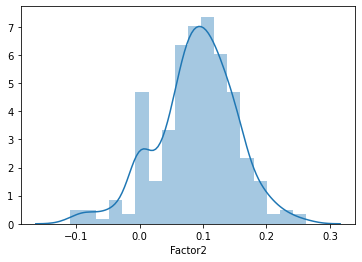

In [15]:
sns.distplot(mofa_drugs['Factor2'])